# Packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import pydotplus 
from IPython.display import Image  

plt.style.use('ggplot')

/Users/mtsodf/OneDrive/Mestrado/DataMining/macos_dataenv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/mtsodf/OneDrive/Mestrado/DataMining/macos_dataenv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Variáveis úteis

In [2]:
zscore = "z-score"
minmax = "maxmin"
original = "original"
duplicate = "duplicate"
eng_data_original = "eng_data_original"
eng_data_zscore = "eng_data_zscore"
seed = 1

# Leitura dos Dados

In [3]:
data = {}
data[original]= pd.read_csv("diabetes/diabetes.csv")


In [4]:
data[original].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Colunas de Predição

In [5]:
predictors = [str(x) for x in data["original"].columns[:-1]]
predict_class = str(data[original].columns[-1])

# Tratamento dos Dados

### Analisando distribuição das variáveis

Vamos analisar a distribuicao dos dados das pessoas com glicose alta

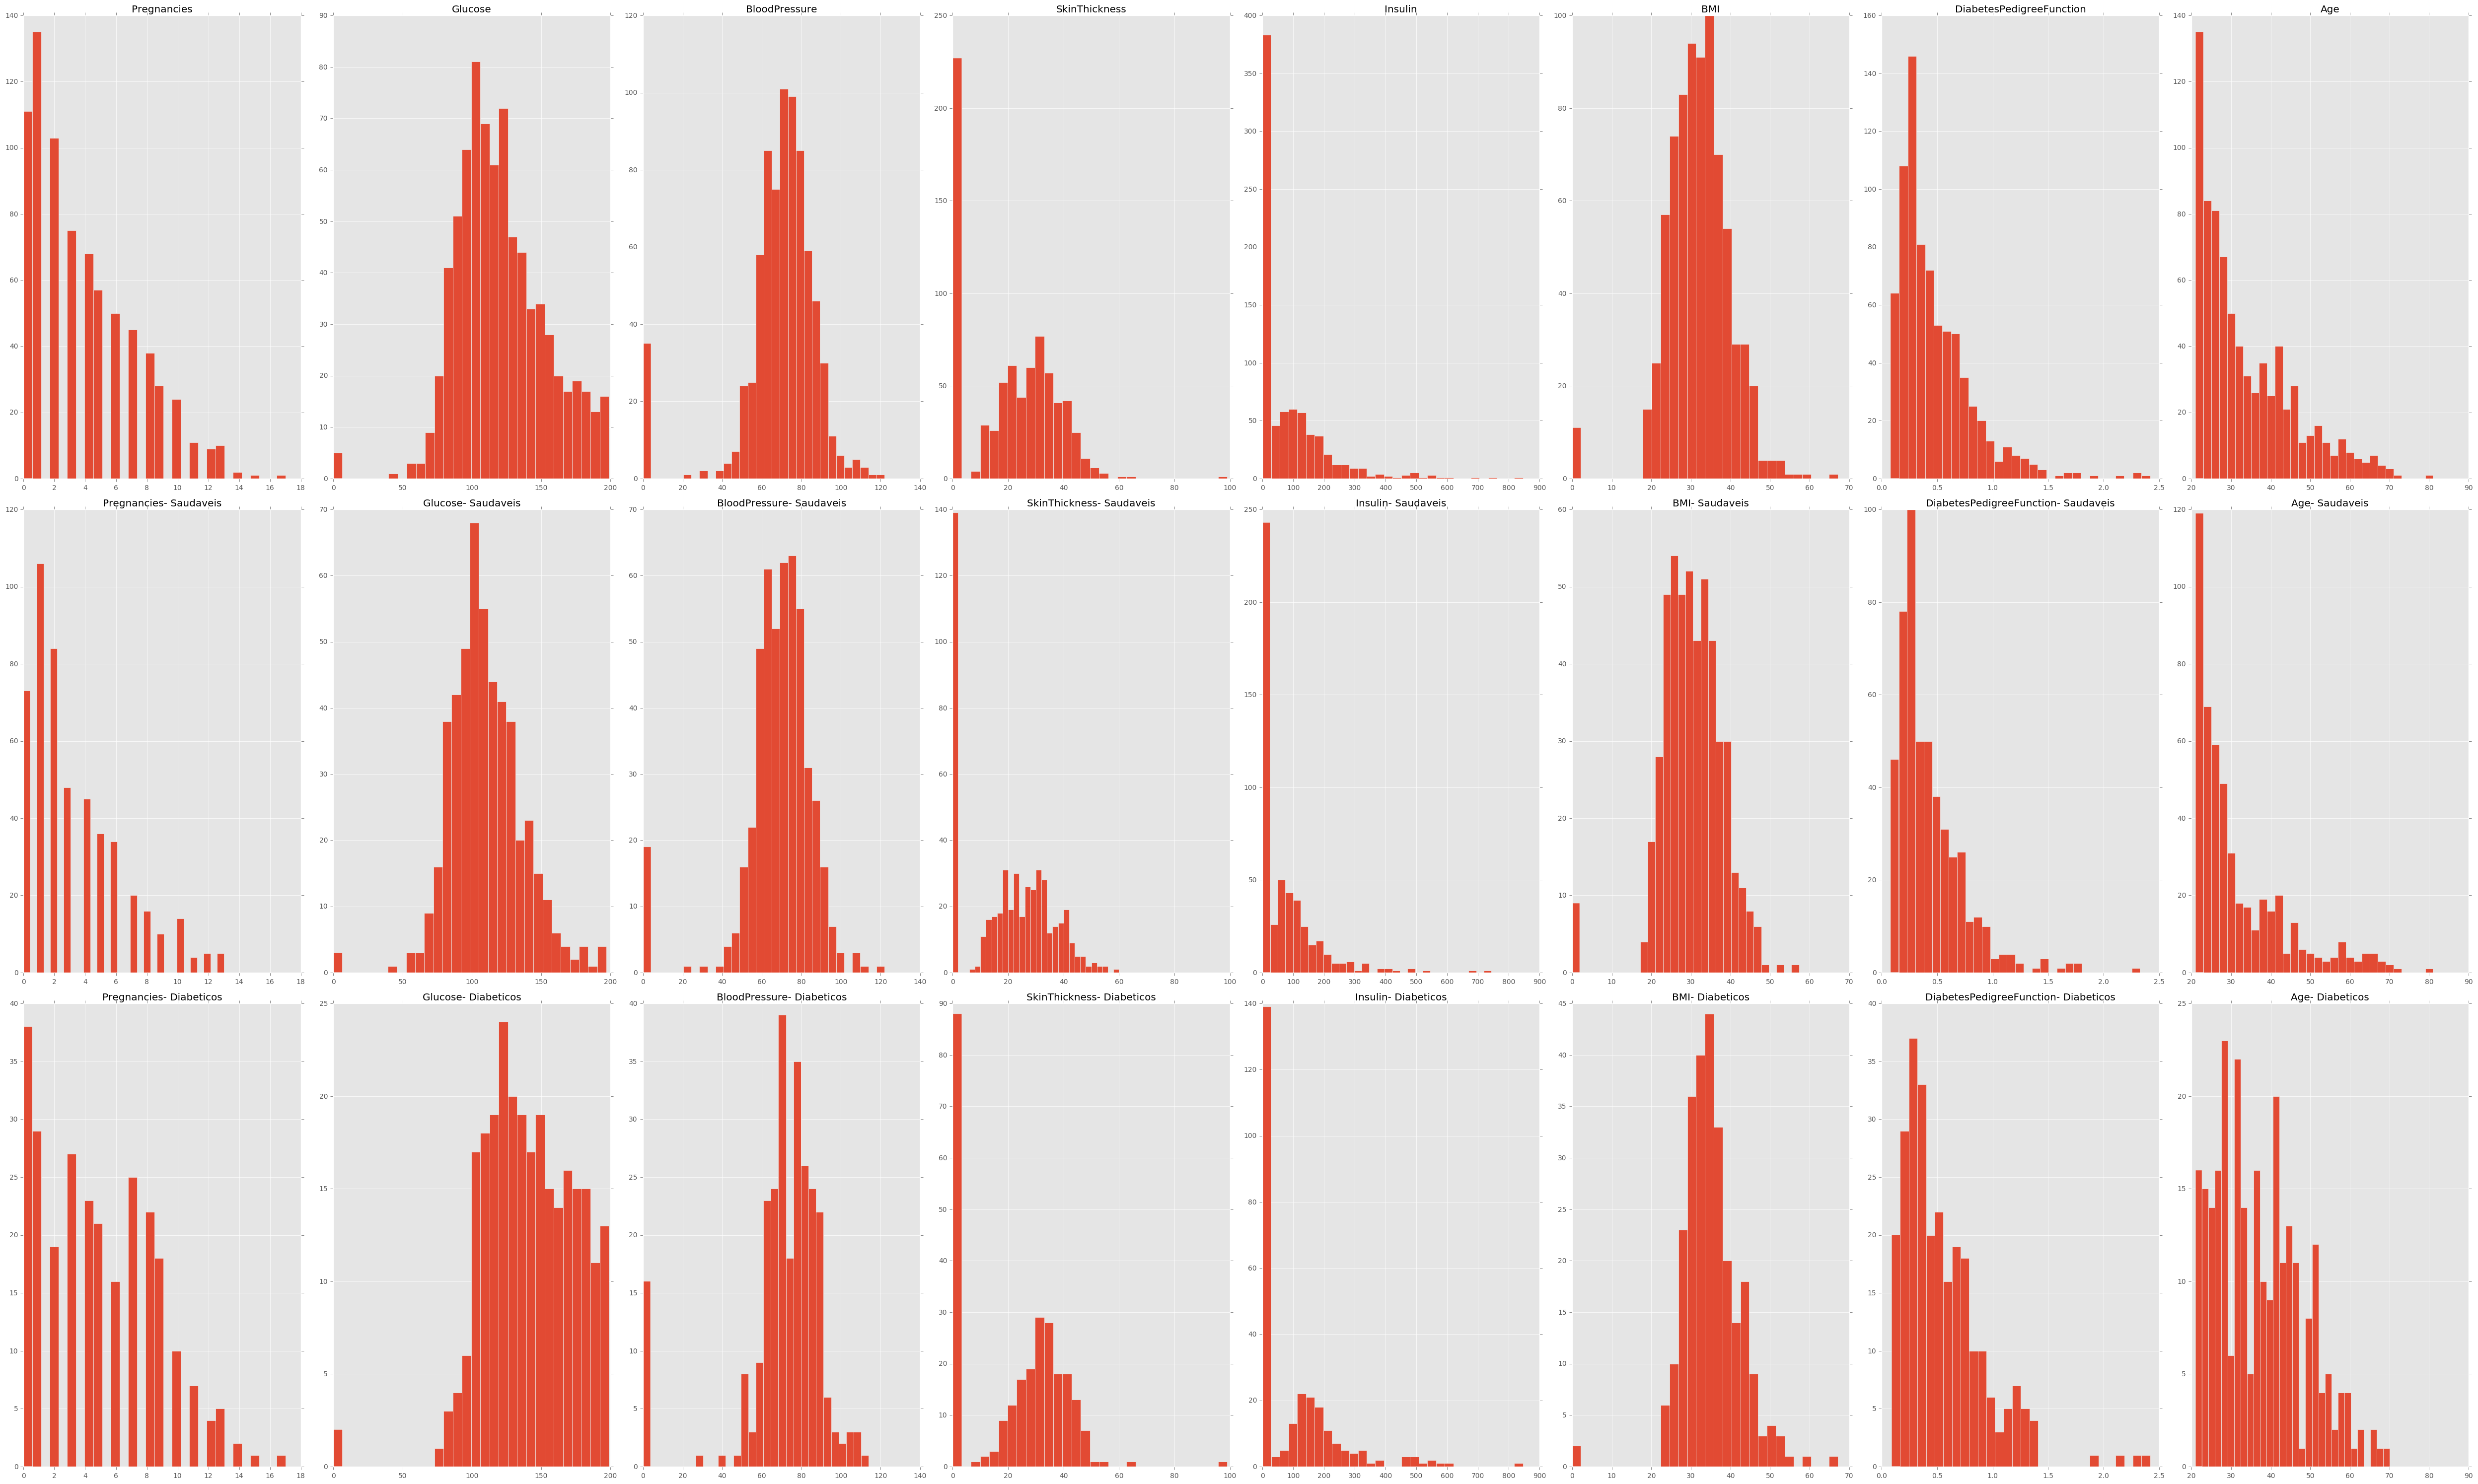

In [6]:
fig, axes = plt.subplots(3, len(predictors), figsize=(50,30))
for i in range(len(predictors)):
   
    label = predictors[i]
    axes[0, i].set_title(label)
    data[original][label].hist(ax=axes[0, i], bins=30)

    label = predictors[i]
    axes[1, i].set_title(label + "- Saudaveis")
    data[original][label].loc[data[original]["Outcome"] == 0].hist(ax=axes[1, i], bins=30)
    
    axes[1, i].set_xlim(axes[0, i].get_xlim())
    #axes[1, i].set_ylim(axes[0, i].get_ylim())
    
    label = predictors[i]
    axes[2, i].set_title(label + "- Diabeticos")
    data[original][label].loc[data[original]["Outcome"] == 1].hist(ax=axes[2, i], bins=30)
    
    axes[2, i].set_xlim(axes[0, i].get_xlim())
    #axes[2, i].set_ylim(axes[0, i].get_ylim())

       
plt.tight_layout()
       


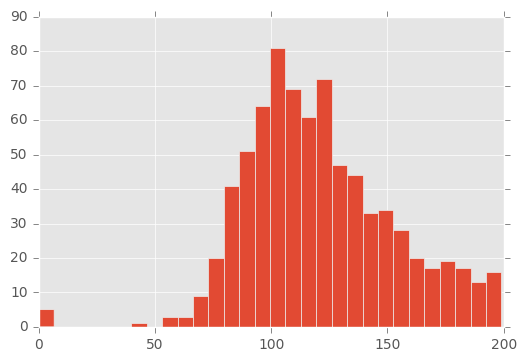

In [7]:
 data[original]["Glucose"].hist( bins=30)

In [8]:
#remover zeros pela media dos casos
for feature in ["Glucose", "BloodPressure", "BMI"]:
    data[original][feature] = data[original][feature].apply(lambda x: data[original][feature].mean() if x <=1 else x)


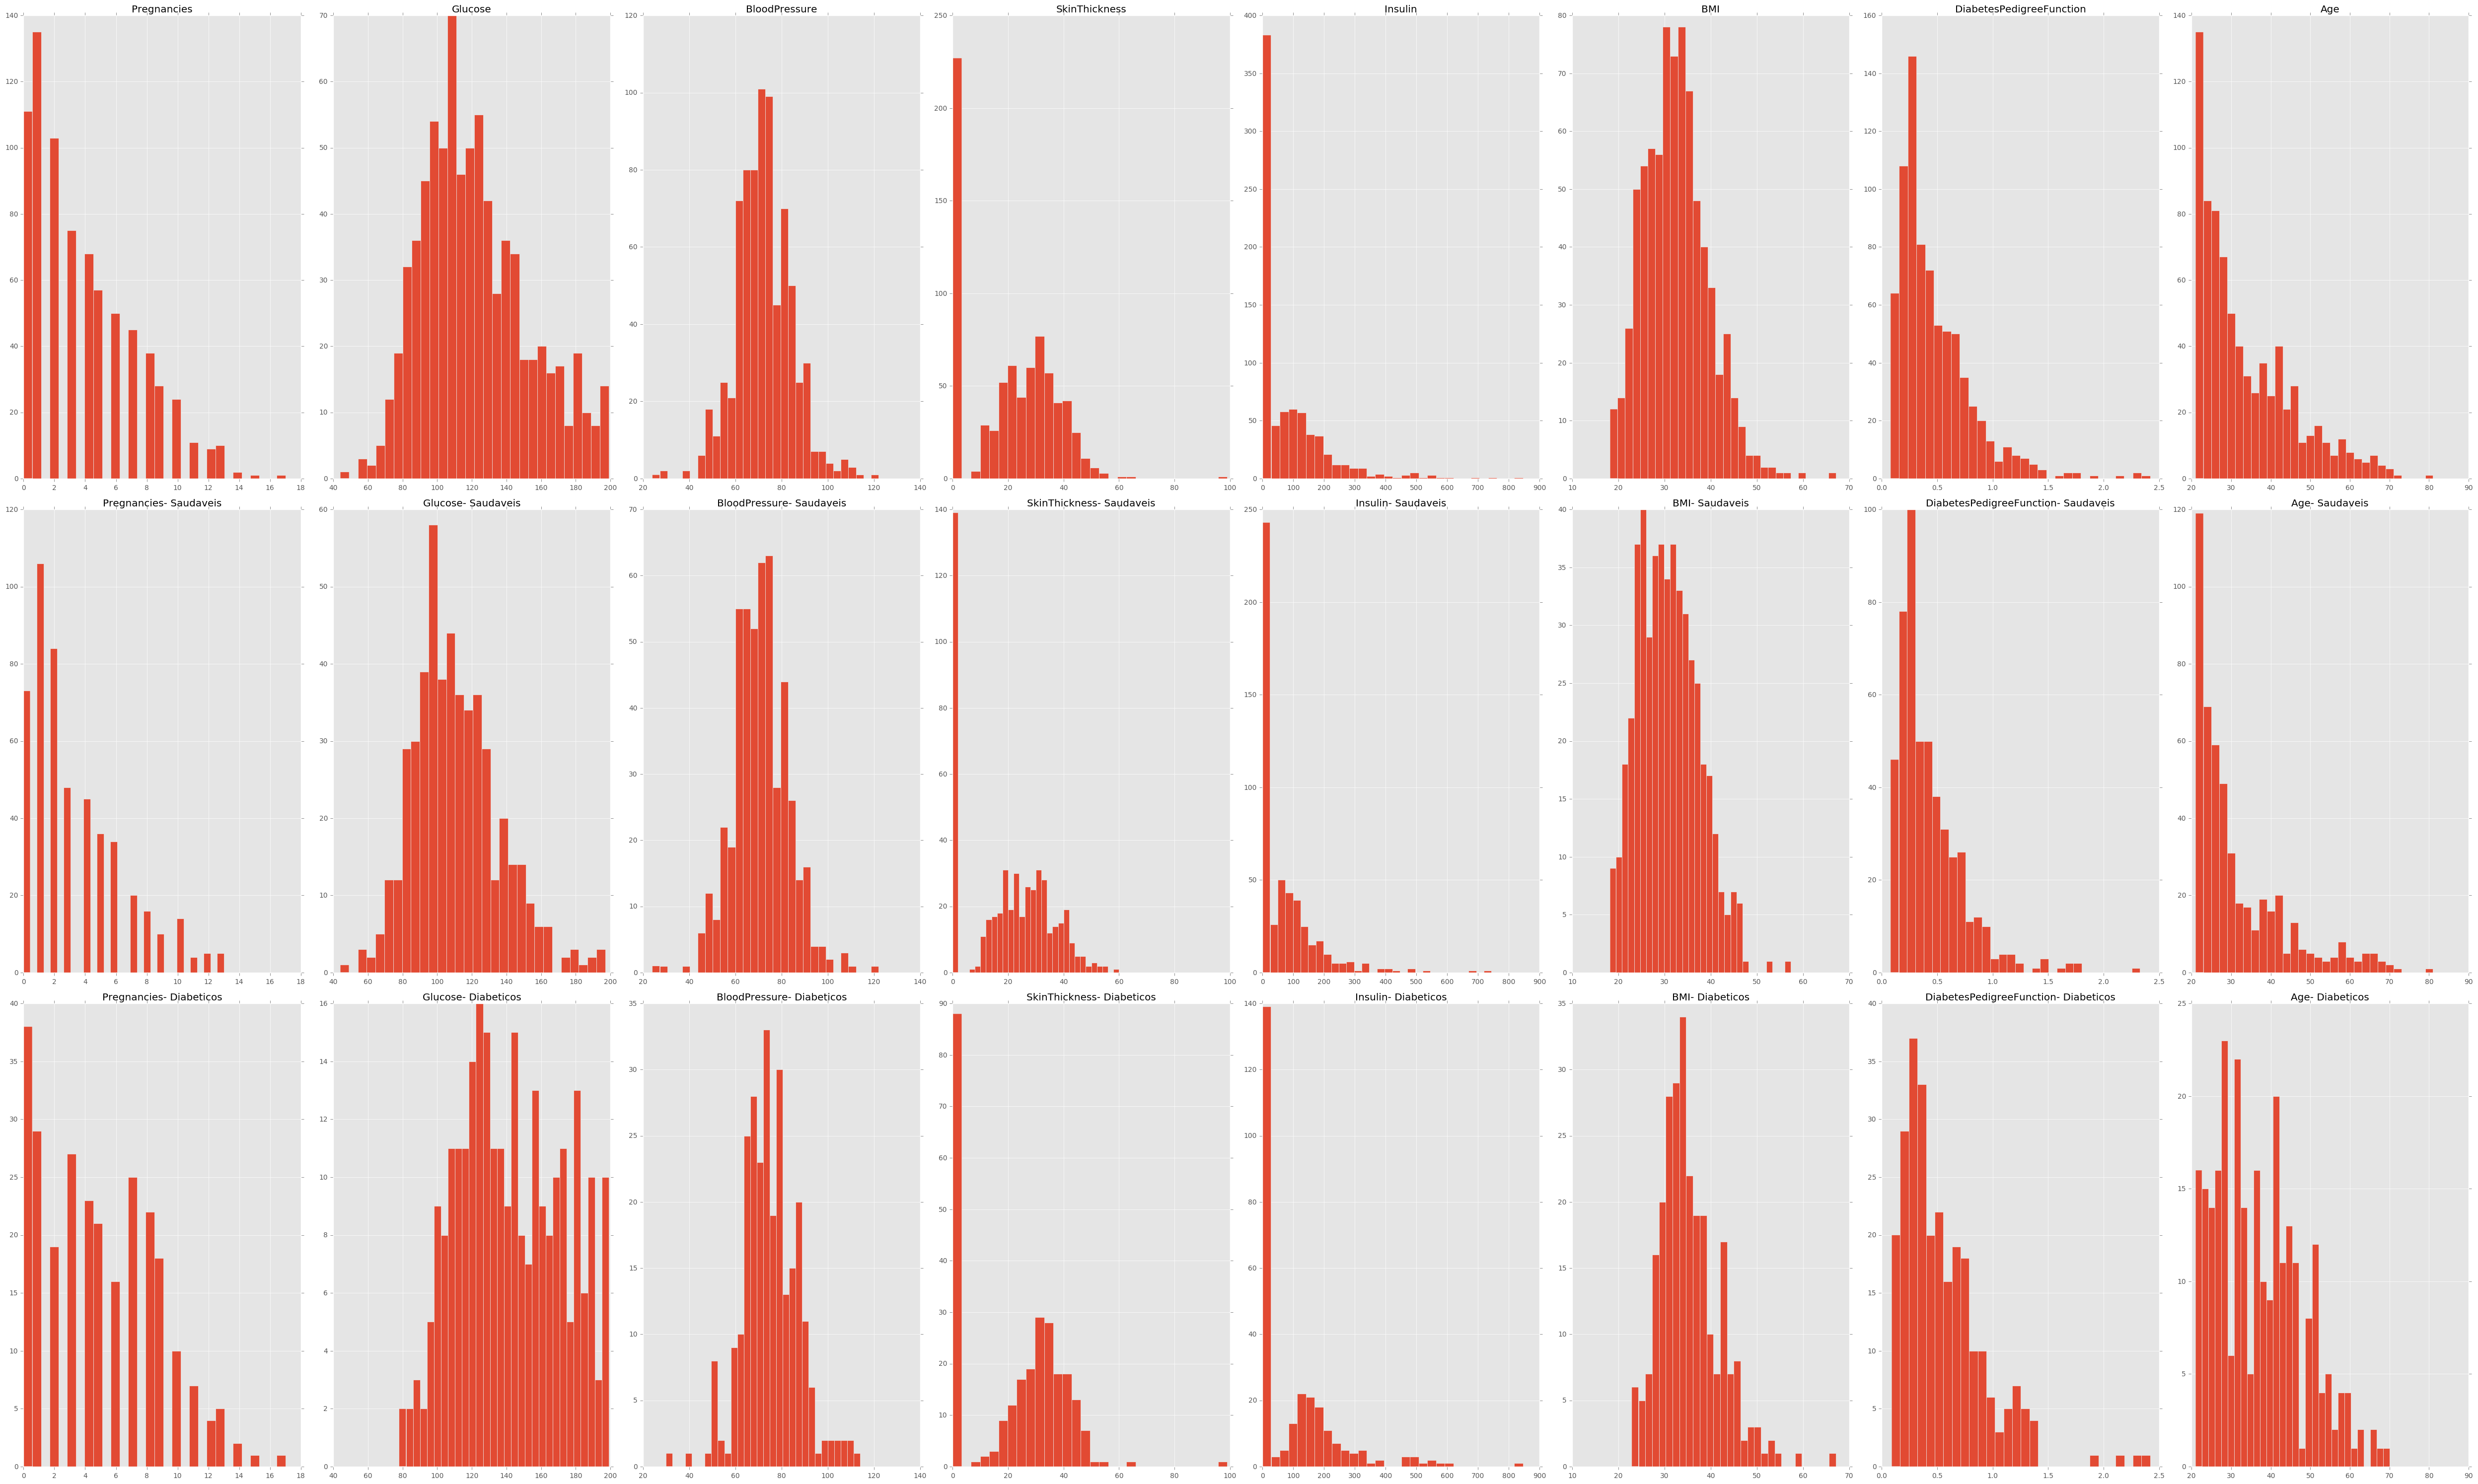

In [9]:
fig, axes = plt.subplots(3, len(predictors), figsize=(50,30))
for i in range(len(predictors)):
   
    label = predictors[i]
    axes[0, i].set_title(label)
    data[original][label].hist(ax=axes[0, i], bins=30)

    label = predictors[i]
    axes[1, i].set_title(label + "- Saudaveis")
    data[original][label].loc[data[original]["Outcome"] == 0].hist(ax=axes[1, i], bins=30)
    
    axes[1, i].set_xlim(axes[0, i].get_xlim())
    #axes[1, i].set_ylim(axes[0, i].get_ylim())
    
    label = predictors[i]
    axes[2, i].set_title(label + "- Diabeticos")
    data[original][label].loc[data[original]["Outcome"] == 1].hist(ax=axes[2, i], bins=30)
    
    axes[2, i].set_xlim(axes[0, i].get_xlim())
    #axes[2, i].set_ylim(axes[0, i].get_ylim())

       
plt.tight_layout()
       


In [10]:
data[original].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


## Corrigindo dados de Skin Thickness

541 541
0.989856233295 -3.40532163968


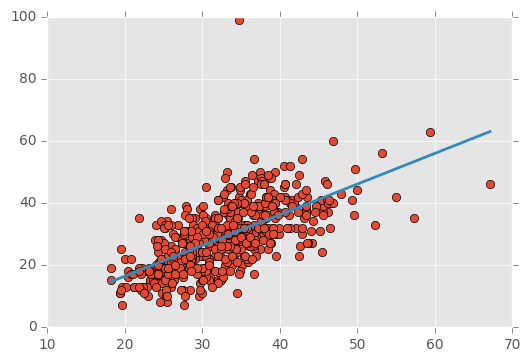

In [11]:

d = data[original].loc[data[original]["SkinThickness"] > 0]

Y = d["SkinThickness"]
X = d["BMI"]

print len(X.values), len(Y.values)

A = np.vstack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(A, Y.values)[0]

print m, c

plt.plot(X,Y, "o")

xsort = np.sort(X) 
xsort = [0] + xsort
plt.plot(xsort ,xsort *m+c, "-", linewidth=2.0)

d = data[original].loc[data[original]["SkinThickness"] == 0]

d = d["BMI"]*m+c


In [12]:
data[original].loc[data[original]["SkinThickness"] == 0, "SkinThickness"] = d.values

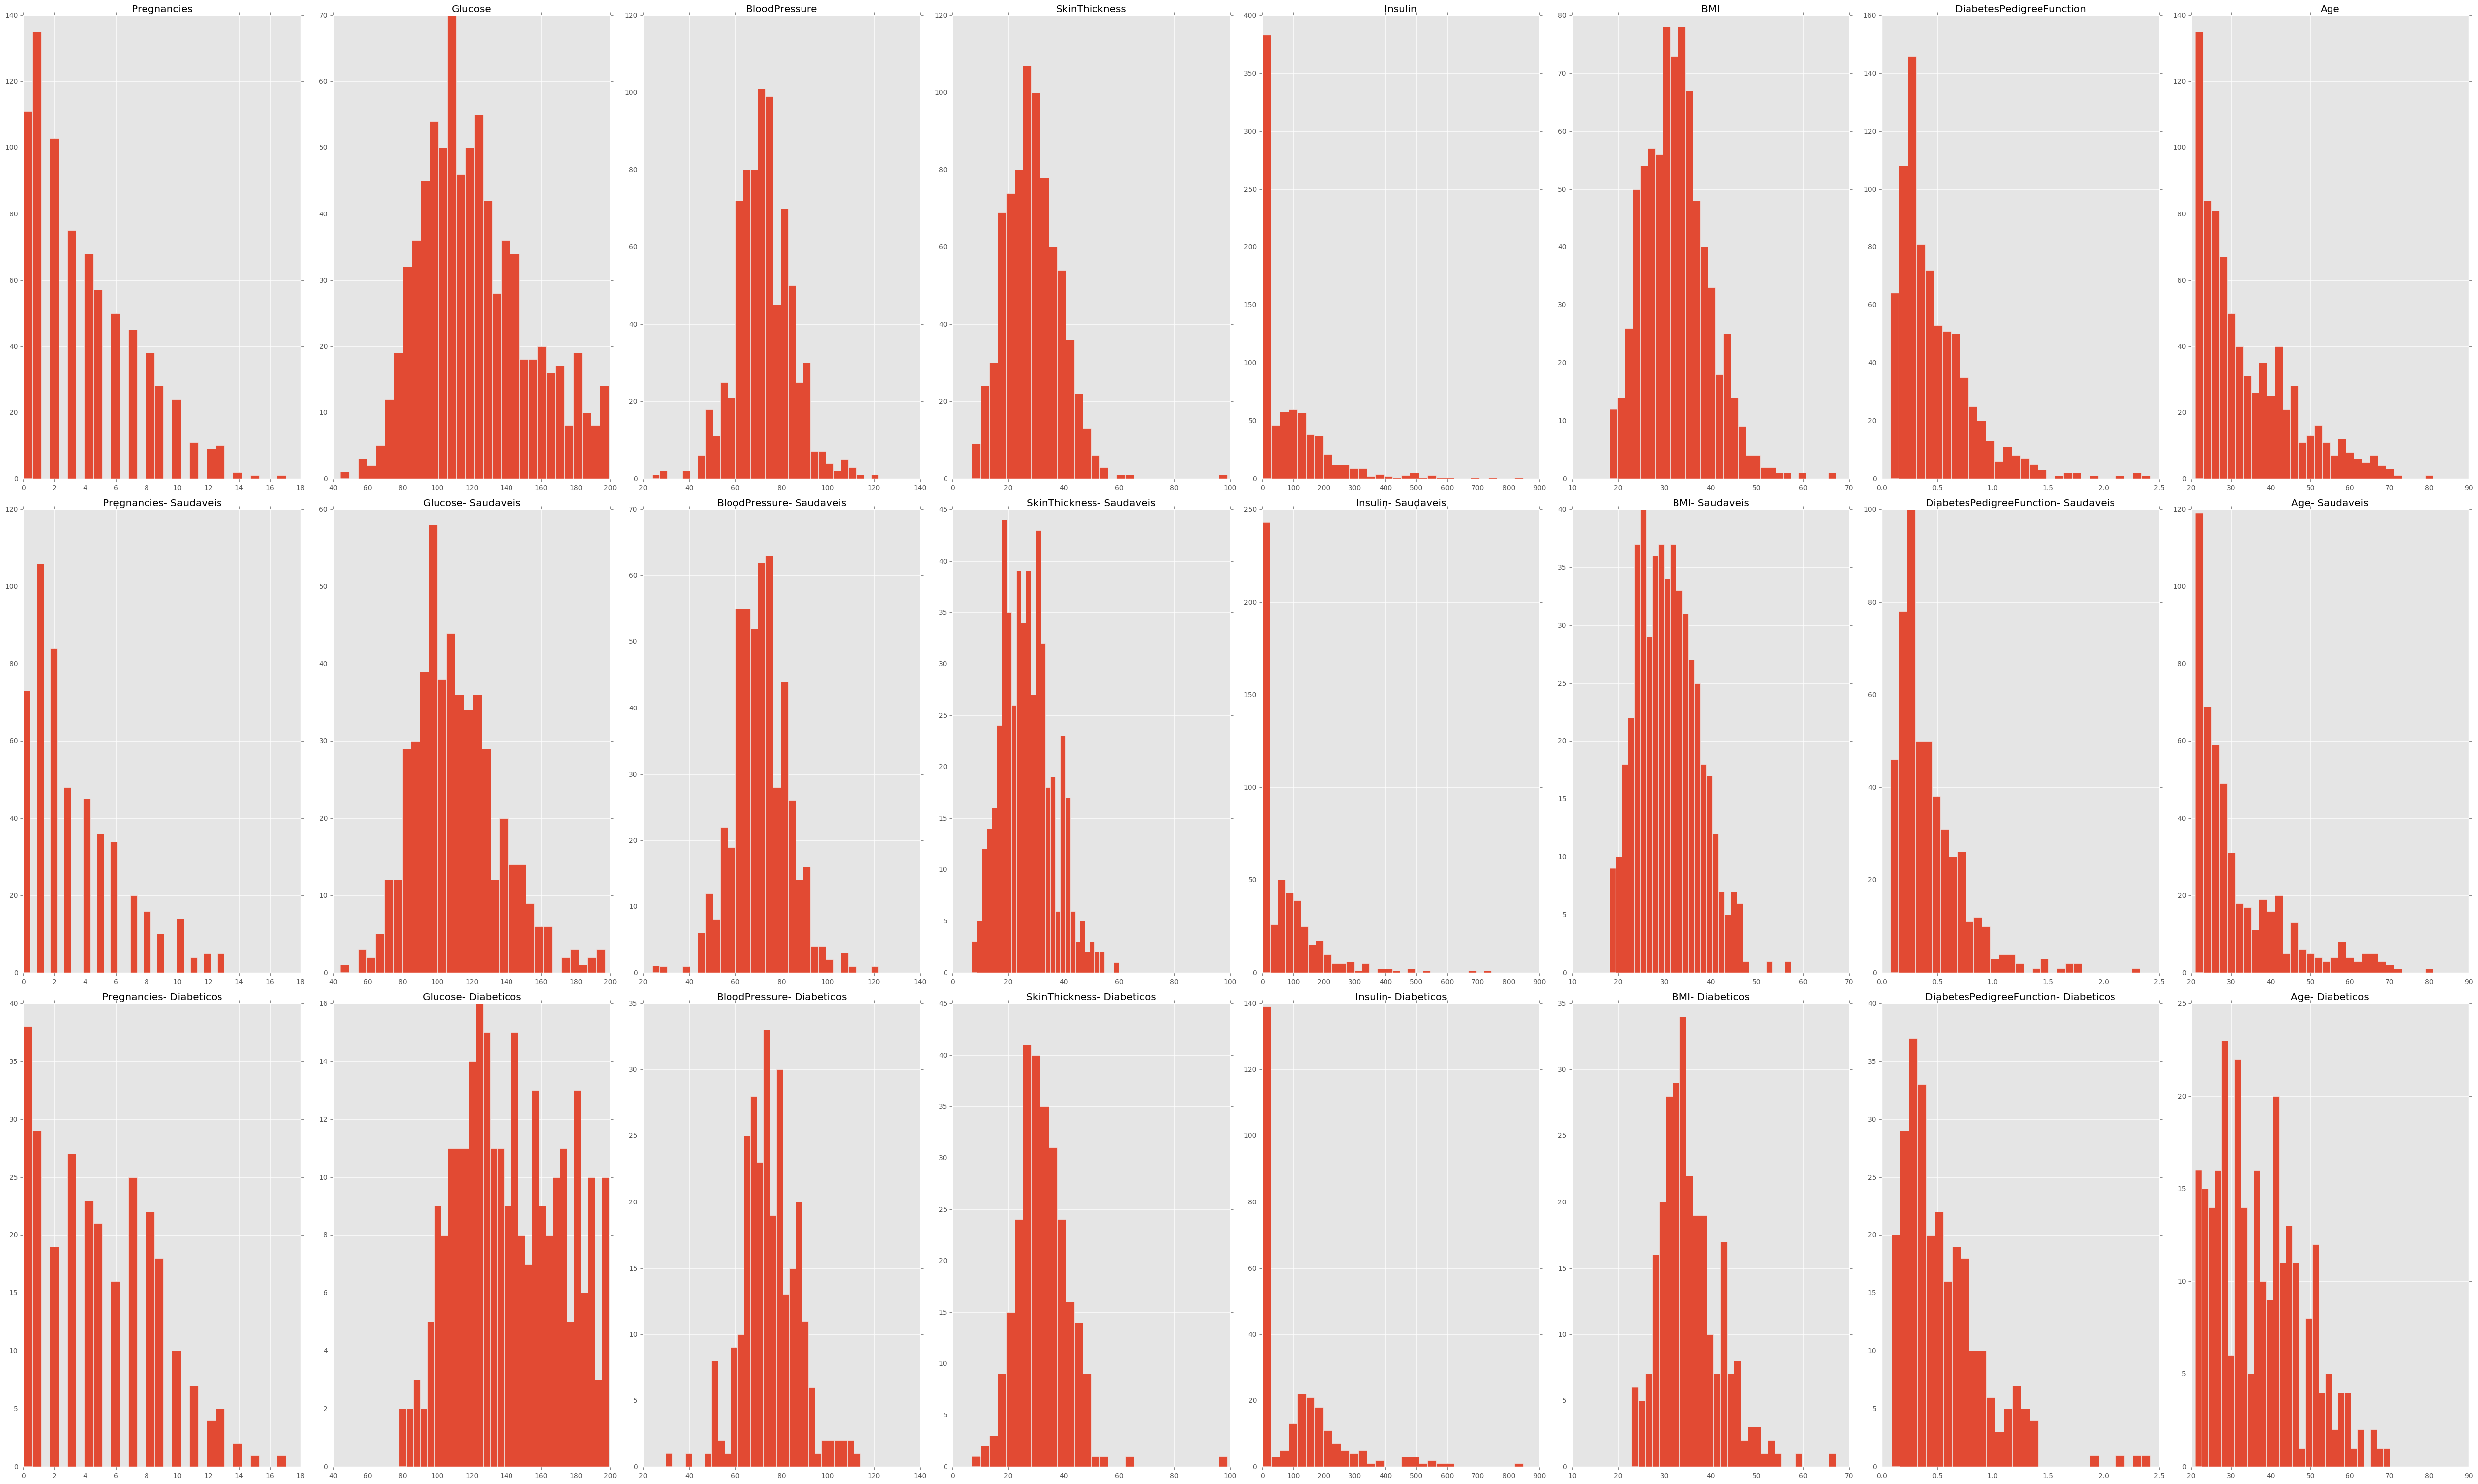

In [13]:
fig, axes = plt.subplots(3, len(predictors), figsize=(50,30))
for i in range(len(predictors)):
   
    label = predictors[i]
    axes[0, i].set_title(label)
    data[original][label].hist(ax=axes[0, i], bins=30)

    label = predictors[i]
    axes[1, i].set_title(label + "- Saudaveis")
    data[original][label].loc[data[original]["Outcome"] == 0].hist(ax=axes[1, i], bins=30)
    
    axes[1, i].set_xlim(axes[0, i].get_xlim())
    #axes[1, i].set_ylim(axes[0, i].get_ylim())
    
    label = predictors[i]
    axes[2, i].set_title(label + "- Diabeticos")
    data[original][label].loc[data[original]["Outcome"] == 1].hist(ax=axes[2, i], bins=30)
    
    axes[2, i].set_xlim(axes[0, i].get_xlim())
    #axes[2, i].set_ylim(axes[0, i].get_ylim())

       
plt.tight_layout()
       


## Normalizando os Dados

In [14]:
data[zscore] = normalize_data(data[original], predictors, zscore)
data[minmax] = normalize_data(data[original], predictors, minmax)

Normalizando Pregnancies com z-score
Normalizando Glucose com z-score
Normalizando BloodPressure com z-score
Normalizando SkinThickness com z-score
Normalizando Insulin com z-score
Normalizando BMI com z-score
Normalizando DiabetesPedigreeFunction com z-score
Normalizando Age com z-score
Normalizando Pregnancies com MaxMin
Normalizando Glucose com MaxMin
Normalizando BloodPressure com MaxMin
Normalizando SkinThickness com MaxMin
Normalizando Insulin com MaxMin
Normalizando BMI com MaxMin
Normalizando DiabetesPedigreeFunction com MaxMin
Normalizando Age com MaxMin


/Users/mtsodf/OneDrive/Mestrado/DataMining/macos_dataenv/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


## Engenharia nos dados

## Plot dos dados

In [15]:
from pandas.tools.plotting import scatter_matrix, parallel_coordinates, andrews_curves

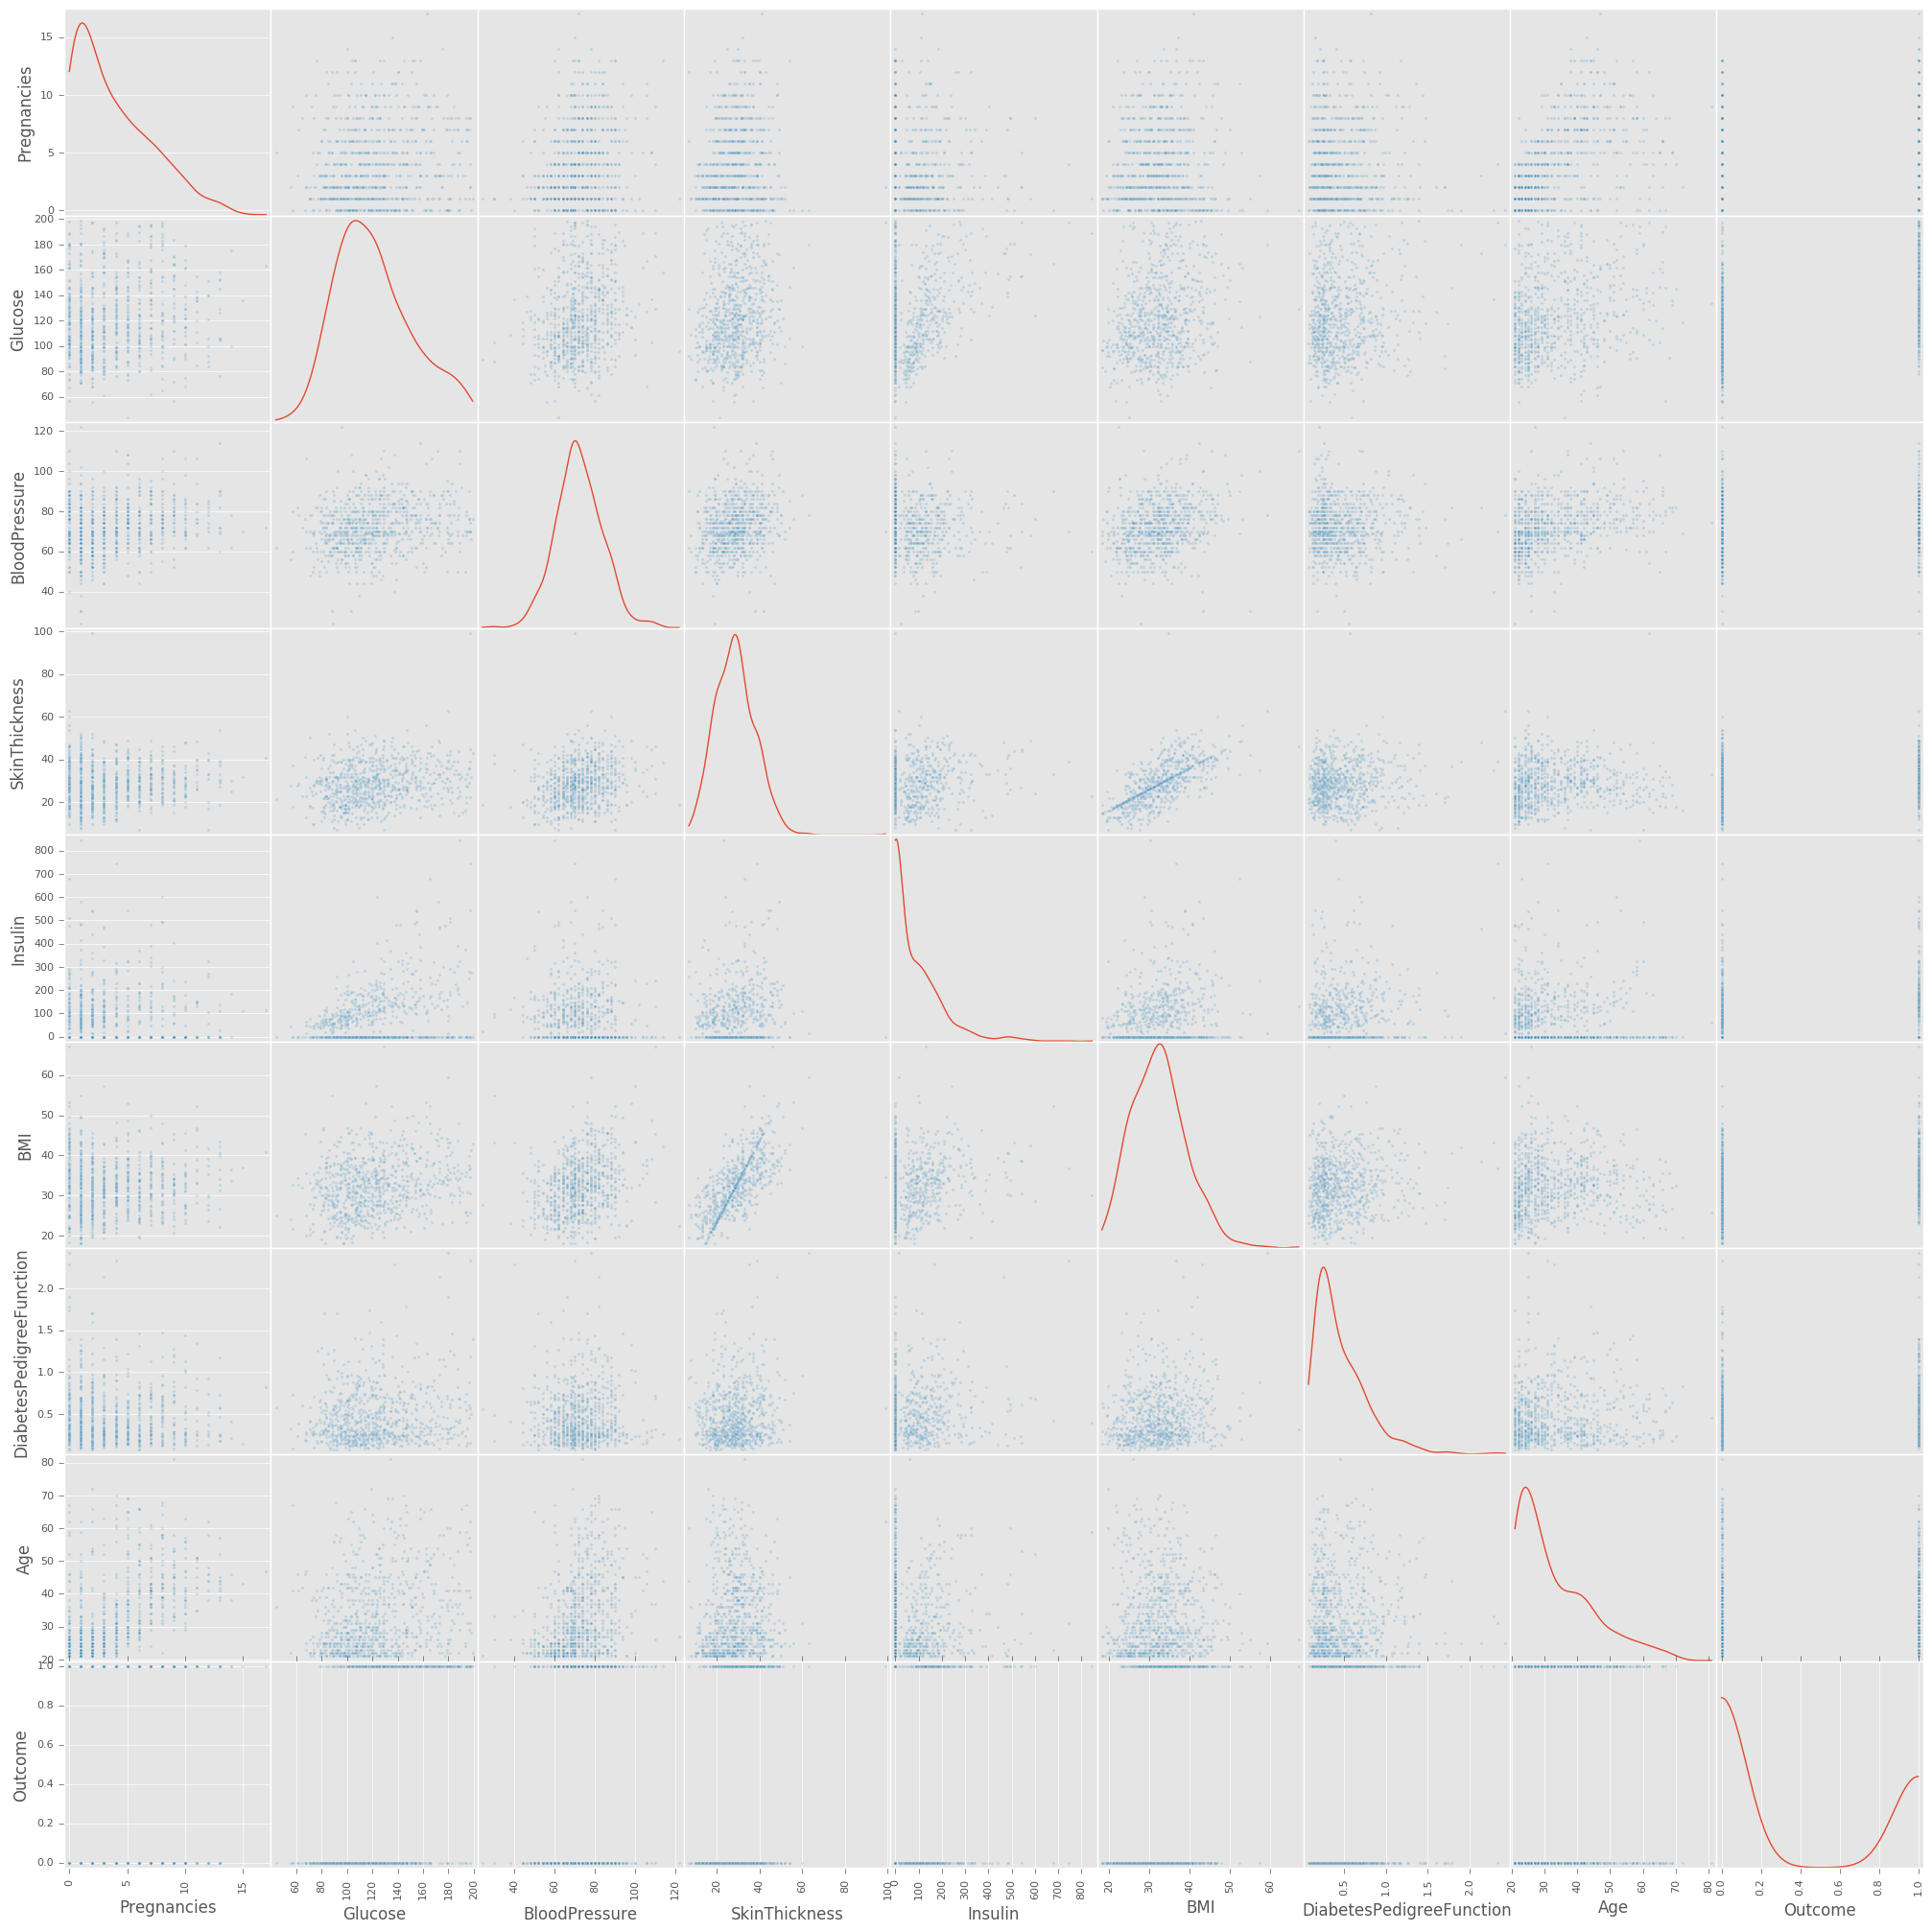

In [16]:
a=scatter_matrix(data[original], alpha=0.2, diagonal='kde', figsize=(25,25))

# Classificadores Triviais

## Classificador Constante

In [17]:
qtd_diabeticos = len(data[original].loc[data[original][predict_class]==1])
qtd_saudaveis = len(data[original].loc[data[original][predict_class]==0])
qtd_total = len(data[original])
clas_trivial = float(qtd_saudaveis)/qtd_total
print "Qtd de diabeticos: %d" % qtd_diabeticos
print "Qtd de nao diabeticos: %d" % qtd_saudaveis
print "Classificador trivial: %5.2f %5.2f" % (clas_trivial, 1-clas_trivial)

Qtd de diabeticos: 268
Qtd de nao diabeticos: 500
Classificador trivial:  0.65  0.35


## Classificador Bayes

In [18]:
alg = GaussianNB()
res = test_algorithm(alg, data["original"], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
print "Classificador Naive Bayes Dados Originais: %5.2f" % res[0]
print res[-1].T
c = res[-1]
print "Sensibilidade %f " %(float(c[1,1])/(c[1,0]+c[1,1]))

res = test_algorithm(alg, data[zscore], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
print "Classificador Naive Bayes Dados z-score:   %5.2f" % res[0]
print res[-1].T
c = res[-1]
print "Sensibilidade %f " %(float(c[1,1])/(c[1,0]+c[1,1]))

res = test_algorithm(alg, data[minmax], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
print "Classificador Naive Bayes Dados minmax:    %5.2f" % res[0]
print res[-1].T
c = res[-1]
print "Sensibilidade %f " %(float(c[1,1])/(c[1,0]+c[1,1]))


Classificador Naive Bayes Dados Originais:  0.75
[[415 108]
 [ 85 160]]
Sensibilidade 0.597015 
Classificador Naive Bayes Dados z-score:    0.75
[[415 107]
 [ 85 161]]
Sensibilidade 0.600746 
Classificador Naive Bayes Dados minmax:     0.75
[[415 107]
 [ 85 161]]
Sensibilidade 0.600746 


# Teste Geral de Classificadores

In [19]:
def pca_acur(data, predictors, predict_class, ax=None, ax_sen=None, balance=False, algs=None, alg_names=None, showlegend=True):
    r = []
    
    if ax:
        ax.tick_params(labelsize=22)
    
    if ax_sen:
        ax_sen.tick_params(labelsize=22)

    for i in range(1, len(predictors) + 1):
        pca = PCA(n_components=i).fit(data[predictors])
        reduced_data = pca.transform(data[predictors]) 
        reduced_data = pd.DataFrame(reduced_data)
        reduced_data[predict_class] = data[predict_class]
        
        if algs is None:
            aux = traine_with_selected_algorithms(reduced_data, range(i), predict_class, seed=1, balance=balance)
        else:
            aux = traine_with_algorithms(reduced_data, range(i), predict_class, alg_names, algs, balance=balance)
        r.append(aux)
    
   
    results = {}
    keys = list(r[-1])
    for k in keys:
        results[k] = []
    
    for x in r:
        for k in keys:
            results[k].append(x[k])
    
    for k in keys:
        if ax is not None:
            ax.plot(range(1, len(predictors) + 1), [x[0] for x in results[k]],  label=k, linewidth=2.0)
        else:
            plt.plot(range(1, len(predictors) + 1), [x[0] for x in results[k]], label=k, linewidth=2.0)
            
        if ax_sen is not None:
            ax_sen.plot(range(1, len(predictors) + 1), [sensibility(x[-1]) for x in results[k]], label=k, linewidth=2.0)
    
    
    if showlegend:
        if ax is not None:
            ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)        
        else:
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        if ax_sen is not None:
            ax_sen.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)        


## Gráficos para classes desproporcionais

/Users/mtsodf/OneDrive/Mestrado/DataMining/macos_dataenv/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


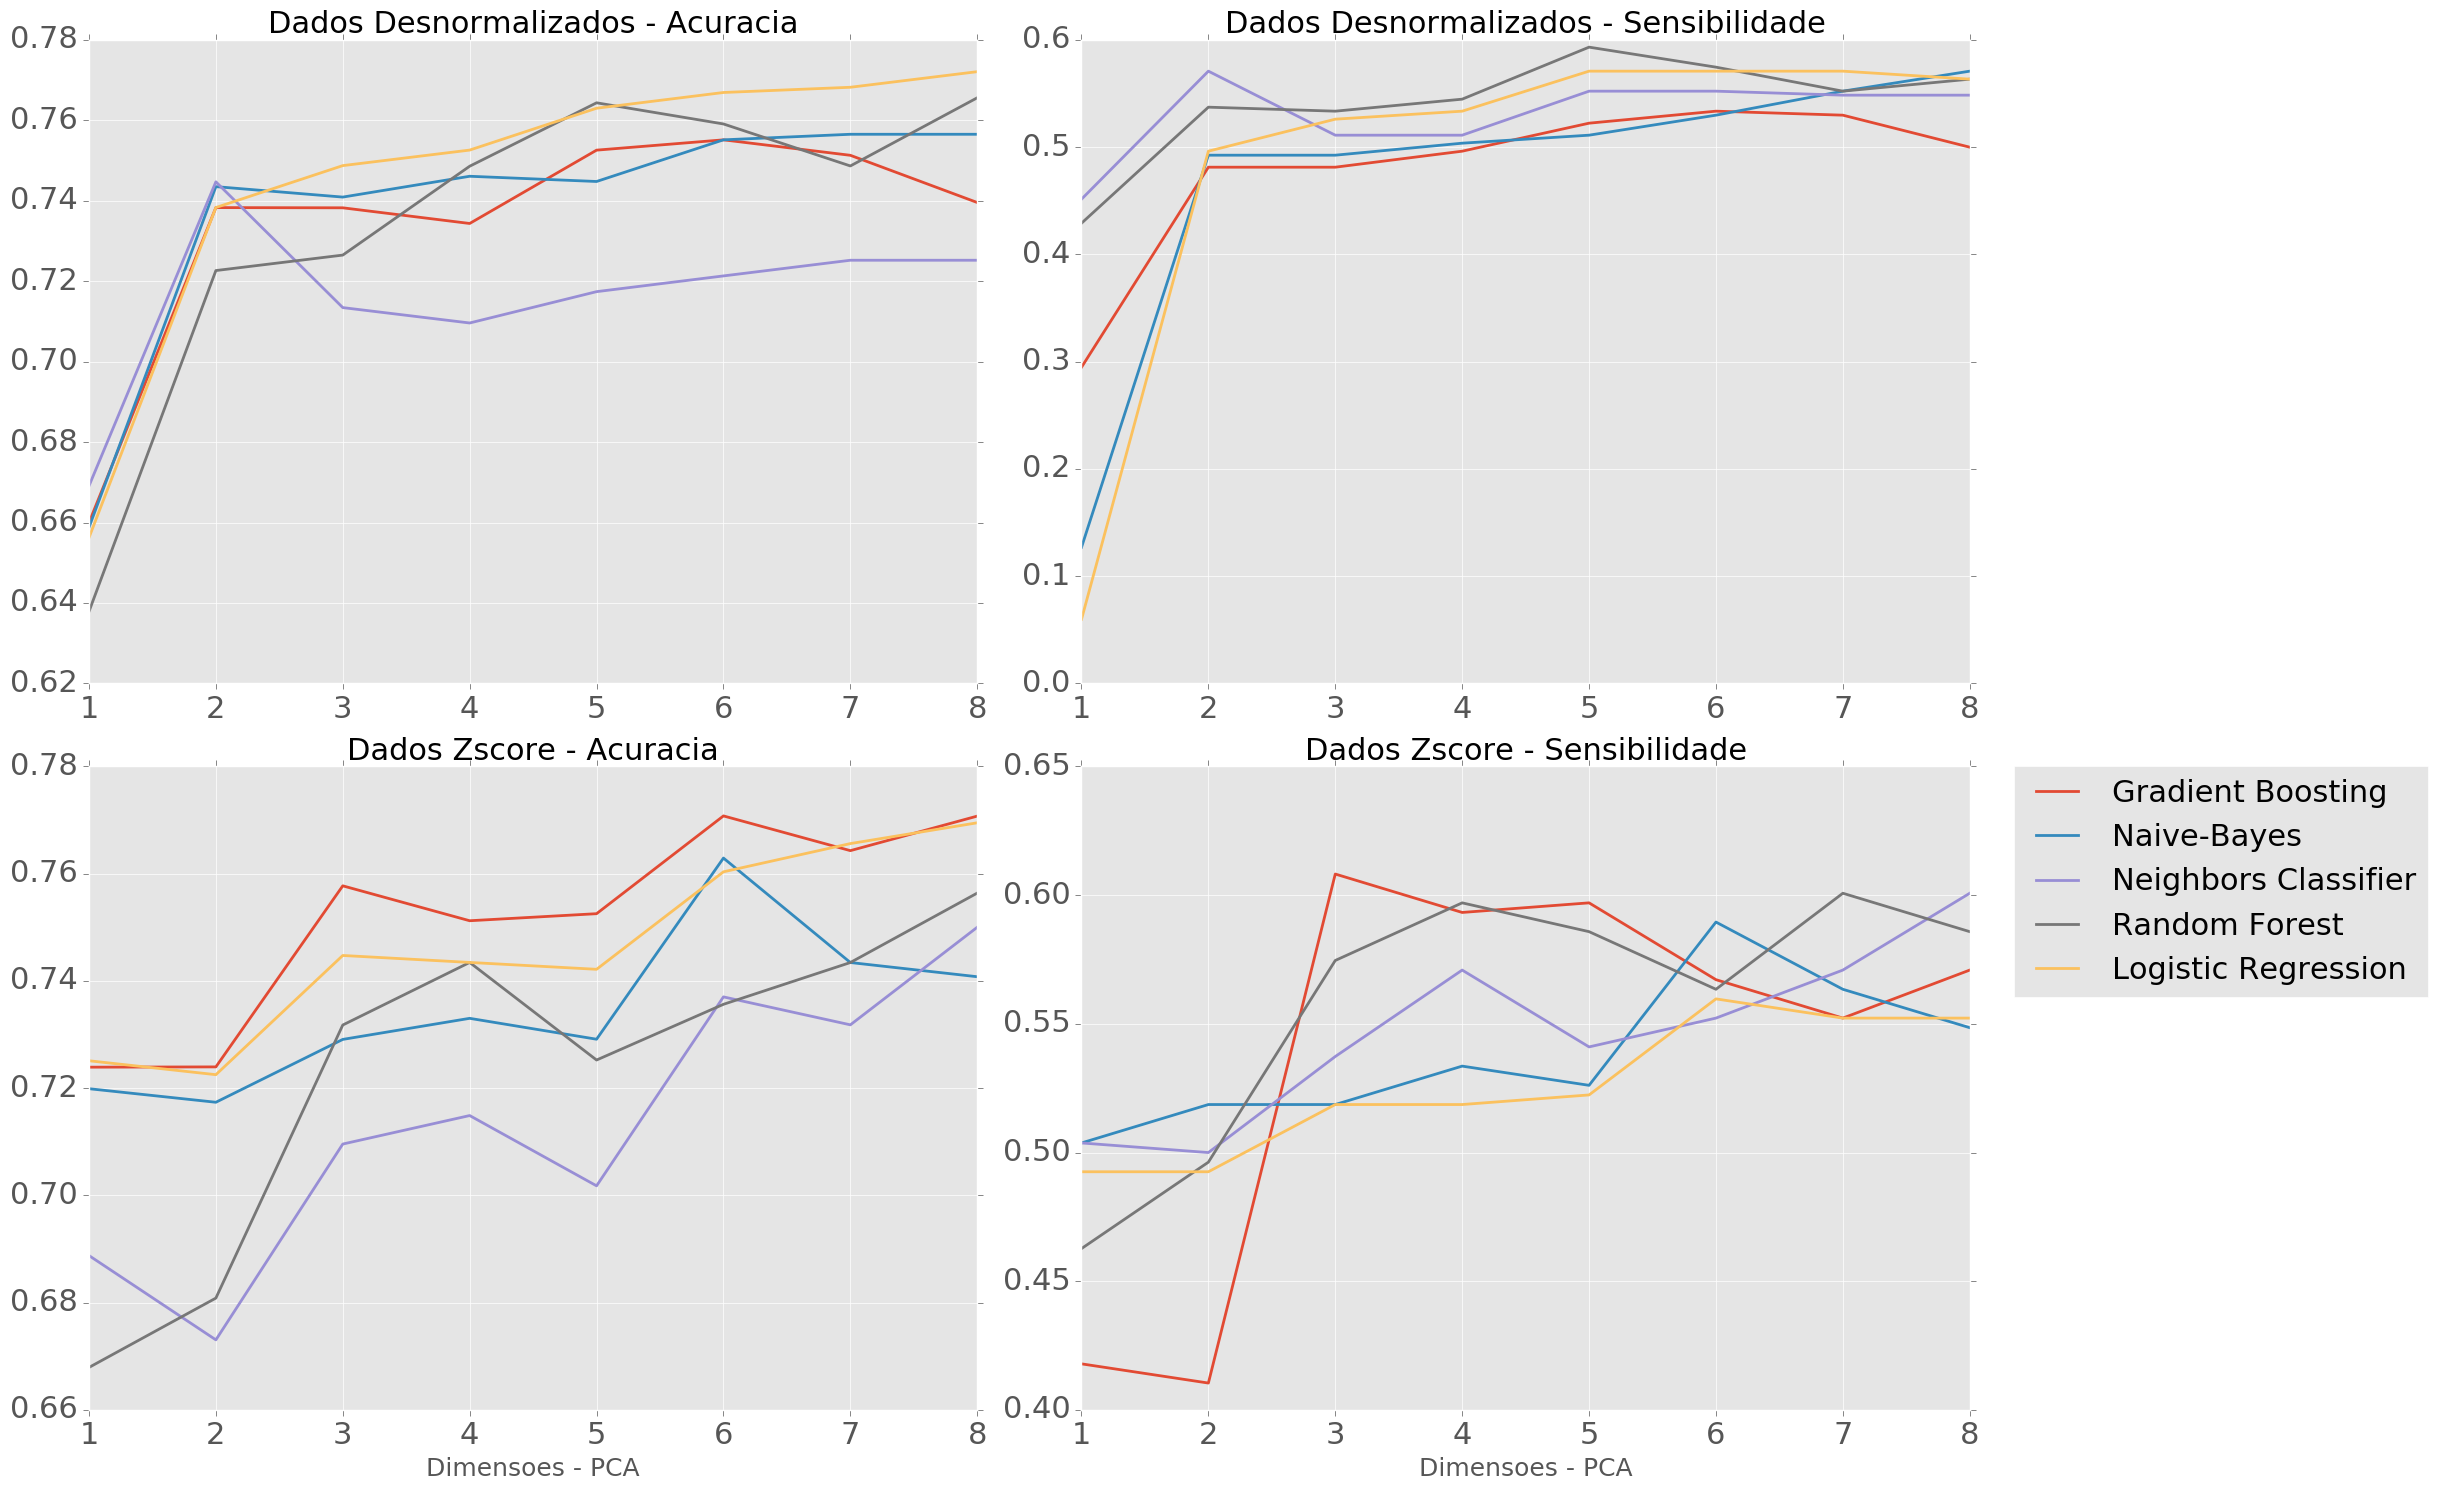

In [20]:
f, axes =  plt.subplots(2, 2, figsize=(20,15))
axes[0,0].set_title("Dados Desnormalizados - Acuracia", fontdict={'fontsize':22})
axes[0,1].set_title("Dados Desnormalizados - Sensibilidade", fontdict={'fontsize':22})
  

pca_acur(data[original], predictors, predict_class, ax=axes[0,0], ax_sen = axes[0,1], showlegend=False)
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=22)

axes[1,0].set_title("Dados Zscore - Acuracia", fontdict={'fontsize':22})
axes[1,1].set_title("Dados Zscore - Sensibilidade", fontdict={'fontsize':22})

pca_acur(data[zscore], predictors, predict_class, ax=axes[1,0], ax_sen=axes[1,1], showlegend=False)
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=22)

axes[1,0].set_xlabel("Dimensoes - PCA", fontsize=18)
axes[1,1].set_xlabel("Dimensoes - PCA", fontsize=18)
       
plt.tight_layout()

## Gráficos para classes balanceadas

In [ ]:
f, axes =  plt.subplots(2, 2, figsize=(20,15))
axes[0,0].set_title("Dados Desnormalizados - Acuracidade", fontdict={'fontsize':22})
axes[0,1].set_title("Dados Desnormalizados - Sensibilidade", fontdict={'fontsize':22})

pca_acur(data[original], predictors, predict_class, ax=axes[0,0], ax_sen = axes[0,1], balance=True, showlegend=False)
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=22)

axes[1,0].set_title("Dados Zscore - Acuracia", fontdict={'fontsize':22})
axes[1,1].set_title("Dados Zscore - Sensibilidade", fontdict={'fontsize':22})
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=22)

pca_acur(data[zscore], predictors, predict_class, ax=axes[1,0], ax_sen=axes[1,1], balance=True, showlegend=False)

axes[1,0].set_xlabel("Dimensoes - PCA", fontsize=18)
axes[1,1].set_xlabel("Dimensoes - PCA", fontsize=18)
      
plt.tight_layout()

## KNN

1 Sensibilidade 0.544776 
2 Sensibilidade 0.361940 
3 Sensibilidade 0.585821 
4 Sensibilidade 0.455224 
5 Sensibilidade 0.548507 
6 Sensibilidade 0.473881 
7 Sensibilidade 0.593284 
8 Sensibilidade 0.511194 
9 Sensibilidade 0.589552 
10 Sensibilidade 0.544776 
11 Sensibilidade 0.585821 
12 Sensibilidade 0.541045 
13 Sensibilidade 0.582090 
14 Sensibilidade 0.533582 
15 Sensibilidade 0.570896 
16 Sensibilidade 0.533582 
17 Sensibilidade 0.559701 
18 Sensibilidade 0.529851 
19 Sensibilidade 0.555970 
20 Sensibilidade 0.537313 
21 Sensibilidade 0.555970 
22 Sensibilidade 0.537313 
23 Sensibilidade 0.555970 
24 Sensibilidade 0.522388 
25 Sensibilidade 0.541045 
26 Sensibilidade 0.518657 
27 Sensibilidade 0.552239 
28 Sensibilidade 0.526119 
29 Sensibilidade 0.537313 
30 Sensibilidade 0.518657 
31 Sensibilidade 0.559701 
32 Sensibilidade 0.533582 
33 Sensibilidade 0.559701 
34 Sensibilidade 0.533582 
35 Sensibilidade 0.563433 
36 Sensibilidade 0.526119 
37 Sensibilidade 0.555970 
38 Sensibi

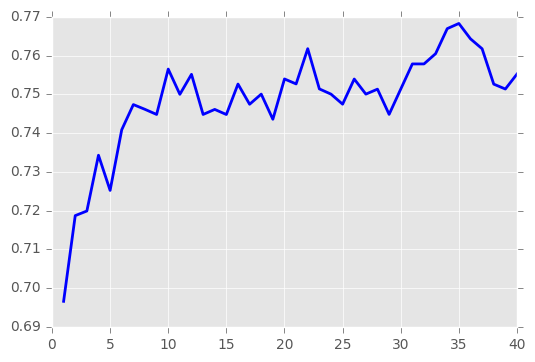

In [29]:
accurs = np.zeros(40)
best_nnz = None
best_score = 0
sens = 0
for i in range(1, 41):
    alg = KNeighborsClassifier(n_neighbors=i)
    res = test_algorithm(alg, data[original], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
    accurs[i-1] = res[0]
    c = res[-1]
    print i, "Sensibilidade %f " %(float(c[1,1])/(c[1,0]+c[1,1]))
    if res[0] > best_score:
        best_score = res[0]
        best_nnz = i
        sens = (float(c[1,1])/(c[1,0]+c[1,1]))
print "Best Score", best_score, "Melhor quantidade de vizinhos", best_nnz, ".Sensibilidade", sens
plt.plot(range(1,41), accurs, "-", color="b", linewidth=2.0)

1 Sensibilidade 0.548507 
2 Sensibilidade 0.373134 
3 Sensibilidade 0.574627 
4 Sensibilidade 0.444030 
5 Sensibilidade 0.600746 
6 Sensibilidade 0.488806 
7 Sensibilidade 0.567164 
8 Sensibilidade 0.503731 
9 Sensibilidade 0.589552 
10 Sensibilidade 0.522388 
11 Sensibilidade 0.574627 
12 Sensibilidade 0.537313 
13 Sensibilidade 0.567164 
14 Sensibilidade 0.522388 
15 Sensibilidade 0.578358 
16 Sensibilidade 0.526119 
17 Sensibilidade 0.585821 
18 Sensibilidade 0.518657 
19 Sensibilidade 0.589552 
20 Sensibilidade 0.518657 
21 Sensibilidade 0.567164 
22 Sensibilidade 0.518657 
23 Sensibilidade 0.563433 
24 Sensibilidade 0.522388 
25 Sensibilidade 0.552239 
26 Sensibilidade 0.522388 
27 Sensibilidade 0.552239 
28 Sensibilidade 0.511194 
29 Sensibilidade 0.544776 
30 Sensibilidade 0.511194 
31 Sensibilidade 0.544776 
32 Sensibilidade 0.500000 
33 Sensibilidade 0.533582 
34 Sensibilidade 0.496269 
35 Sensibilidade 0.514925 
36 Sensibilidade 0.481343 
37 Sensibilidade 0.507463 
38 Sensibi

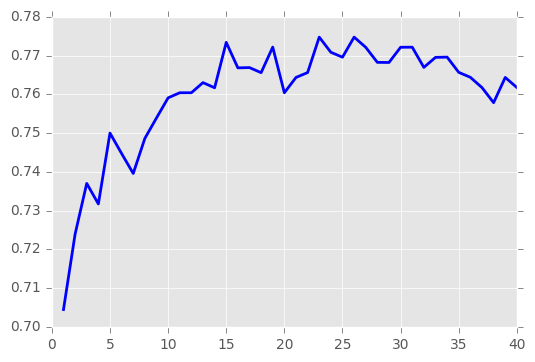

In [30]:
accurs = np.zeros(40)
best_nnz_zscore = None
best_score = 0
sens = 0
for i in range(1, 41):
    alg = KNeighborsClassifier(n_neighbors=i)
    res = test_algorithm(alg, data[zscore], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
    accurs[i-1] = res[0]
    c = res[-1]
    print i, "Sensibilidade %f " %(float(c[1,1])/(c[1,0]+c[1,1]))
    if res[0] > best_score:
        best_score = res[0]
        best_nnz_zscore = i
        sens = (float(c[1,1])/(c[1,0]+c[1,1]))

print "Best Score", best_score, ". Melhor quantidade de vizinhos", best_nnz_zscore, ".Sensibilidade", sens
plt.plot(range(1,41), accurs, "-", color="b", linewidth=2.0)

## Random Forest

In [33]:
def plot_grid_search(grid_search):
    k = list(grid_search.keys())
    k.sort()

    x, y  = zip(*k)
    x = list(set(x))
    y = list(set(y))
    x.sort()
    y.sort()
    z = np.zeros((len(y), len(x)))

    for i in range(len(x)):
        for j in range(len(y)):
            z[j, i] = grid_search[x[i],y[j]][0]
    fig, ax = plt.subplots(1,1)
    cax = ax.pcolor(z)
    ax.legend()
    ax.set_yticks(np.arange(z.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(z.shape[1]) + 0.5, minor=False)
    ax.set_xticklabels([str(s) for s in x],minor=False)
    ax.set_yticklabels([str(s) for s in y], minor=False)
    plt.colorbar(cax)

### Teste quantas arvores necessárias para o melhor resultado

In [ ]:
best_original = None
best_score = 0
grid_search = {}
sens = 0
for max_depth in range(5,16):
    for n_estimators in range(10,101,10):
        alg = RandomForestClassifier(random_state=1, n_estimators=n_estimators ,max_depth=max_depth , min_samples_split=4, min_samples_leaf=2)
        aux = test_algorithm(alg, data[original], predictors, predict_class, treat_output=None, seed=1, n_folds=10, balance=False)
        
        grid_search[(max_depth, n_estimators)] = aux
        if aux[0] > best_score:
            best_score = aux[0]
            best_original = (max_depth, n_estimators)
            sens = sensibility(aux[-1])
    
print "best = ", best_original_balanced ,". Score ", best_score, ". Sensibilidade", sens


In [ ]:
plot_grid_search(grid_search)

In [ ]:
best_original_balanced = None
best_score = 0
grid_search = {}
sens = 0
for max_depth in range(5,16):
    for n_estimators in range(10,101,10):
        alg = RandomForestClassifier(random_state=1, n_estimators=n_estimators ,max_depth=max_depth , min_samples_split=4, min_samples_leaf=2)
        aux = test_algorithm(alg, data[original], predictors, predict_class, treat_output=None, seed=1, n_folds=10, balance=True)
        
        grid_search[(max_depth, n_estimators)] = aux
        if aux[0] > best_score:
            best_score = aux[0]
            best_original_balanced = (max_depth, n_estimators)
            sens = sensibility(aux[-1])
print "best = ", best_original_balanced ,". Score ", best_score, ". Sensibilidade", sens

In [ ]:
plot_grid_search(grid_search)

In [ ]:
best_zscore = None
best_score = 0
grid_search = {}
sens = 0
for max_depth in range(5,16):
    for n_estimators in range(10,101,10):
        print max_depth, n_estimators
        alg = RandomForestClassifier(random_state=1, n_estimators=n_estimators ,max_depth=max_depth , min_samples_split=4, min_samples_leaf=2)
        aux = test_algorithm(alg, data[zscore], predictors, predict_class, treat_output=None, seed=1, n_folds=10, balance=False)
        
        grid_search[(max_depth, n_estimators)] = aux
        if aux[0] > best_score:
            best_score = aux[0]
            best_zscore = (max_depth, n_estimators)
            sens = sensibility(aux[-1])
    
print "best = ", best_zscore ,". Score ", best_score , ". Sensibilidade", sens

In [ ]:
plot_grid_search(grid_search)

In [45]:
best_zscore_balanced = None
best_score = 0
grid_search = {}
sens = 0
for max_depth in range(5,16):
    for n_estimators in range(10,101,10):
        print max_depth, n_estimators
        alg = RandomForestClassifier(random_state=1, n_estimators=n_estimators ,max_depth=max_depth , min_samples_split=4, min_samples_leaf=2)
        aux = test_algorithm(alg, data[zscore], predictors, predict_class, treat_output=None, seed=1, n_folds=10, balance=True)
        
        grid_search[(max_depth, n_estimators)] = aux
        if aux[0] > best_score:
            best_score = aux[0]
            best_zscore_balanced = (max_depth, n_estimators)
            sens = sensibility(aux[-1])
    
print "best = ", best_zscore_balanced ,". Score ", best_score, ". Sensibilidade", sens

5 10
5 20
5 30
5 40
5 50
5 60
5 70
5 80
5 90
5 100
6 10
6 20
6 30
6 40
6 50
6 60
6 70
6 80
6 90
6 100
7 10
7 20
7 30
7 40
7 50
7 60
7 70
7 80
7 90
7 100
8 10
8 20
8 30
8 40
8 50
8 60
8 70
8 80
8 90
8 100
9 10
9 20
9 30
9 40
9 50
9 60
9 70
9 80
9 90
9 100
10 10
10 20
10 30
10 40
10 50
10 60
10 70
10 80
10 90
10 100
11 10
11 20
11 30
11 40
11 50
11 60
11 70
11 80
11 90
11 100
12 10
12 20
12 30
12 40
12 50
12 60
12 70
12 80
12 90
12 100
13 10
13 20
13 30
13 40
13 50
13 60
13 70
13 80
13 90
13 100
14 10
14 20
14 30
14 40
14 50
14 60
14 70
14 80
14 90
14 100
15 10
15 20
15 30
15 40
15 50
15 60
15 70
15 80
15 90
15 100
best =  (9, 30) . Score  0.772095010253 . Sensibilidade 0.723880597015


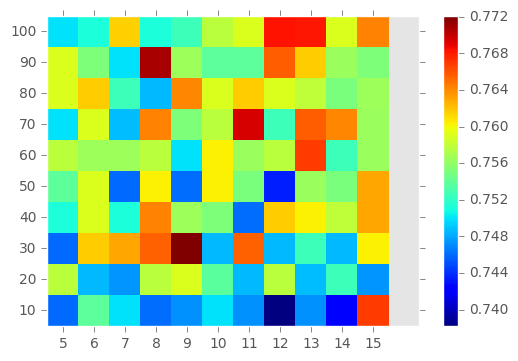

In [46]:
plot_grid_search(grid_search)

# Melhores Resultados - Dados desnormalizados

In [ ]:
best_original = (13, 70)
best_original_balanced = (11, 60)
best_zscore = (14, 40)
best_zscore_balanced = (14,90)

In [ ]:
algs = []
algs.append(KNeighborsClassifier(n_neighbors=best_nnz))
algs.append(LogisticRegression(random_state=seed))
algs.append(GaussianNB())
algs.append(RandomForestClassifier(random_state=1,
                                       n_estimators=best_original[1], min_samples_split=4, min_samples_leaf=2, max_depth=best_original[0]))

#algs.append(SVC(kernel='linear'))

names = ["Neighbors Classifier", "Logistic Regression", "Naive-Bayes",
             "Random Forest"]
#names.append("SVM Linear")


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30, 20))

pca_acur(data[original], predictors, predict_class, ax=ax1, ax_sen=ax2, balance=False, algs=algs, alg_names=names)

In [ ]:
algs = []
algs.append(KNeighborsClassifier(n_neighbors=best_nnz))
algs.append(LogisticRegression(random_state=seed))
algs.append(GaussianNB())
algs.append(RandomForestClassifier(random_state=1,
                                       n_estimators=best_original_balanced[1], min_samples_split=4, min_samples_leaf=2, max_depth=best_original_balanced[0]))


names = ["Neighbors Classifier", "Logistic Regression", "Naive-Bayes",
             "Random Forest"]



fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30, 20))

pca_acur(data[original], predictors, predict_class, ax=ax1, ax_sen=ax2, balance=True, algs=algs, alg_names=names)

# Melhores Resultados - Dados Zscore

In [ ]:
algs = []
algs.append(KNeighborsClassifier(n_neighbors=best_nnz))
algs.append(LogisticRegression(random_state=seed))
algs.append(GaussianNB())
algs.append(RandomForestClassifier(random_state=1,
                                       n_estimators=best_zscore[1], min_samples_split=4, min_samples_leaf=2, max_depth=best_zscore[0]))



names = ["Neighbors Classifier", "Logistic Regression", "Naive-Bayes",
             "Random Forest"]



fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30, 20))

pca_acur(data[original], predictors, predict_class, ax=ax1, ax_sen=ax2, balance=False, algs=algs, alg_names=names)

In [ ]:
algs = []
algs.append(KNeighborsClassifier(n_neighbors=best_nnz))
algs.append(LogisticRegression(random_state=seed))
algs.append(GaussianNB())
algs.append(RandomForestClassifier(random_state=1,
                                       n_estimators=80, min_samples_split=4, min_samples_leaf=2, max_depth=11))



names = ["Neighbors Classifier", "Logistic Regression", "Naive-Bayes",
             "Random Forest"]



fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30, 20))

pca_acur(data[original], predictors, predict_class, ax=ax1, ax_sen=ax2, balance=True, algs=algs, alg_names=names)

In [ ]:
names = ["Neighbors Classifier", "Logistic Regression", "Naive-Bayes",
             "Random Forest", "Gradient Boosting", "Neural Network", "SVM Linear"]
algs = []
algs.append(KNeighborsClassifier(n_neighbors=35))
algs.append(LogisticRegression(random_state=seed))
algs.append(GaussianNB())
algs.append(RandomForestClassifier(random_state=1, n_estimators=40, max_depth=14, min_samples_split=4, min_samples_leaf=2))
algs.append(GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3))
algs.append(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 5), random_state=1))
algs.append(SVC(kernel='linear'))

f, axes =  plt.subplots(2, 2, figsize=(30,15))
axes[0,0].set_title("Dados Originais - Acuracidade")
axes[0,1].set_title("Dados Originais - Sensibilidade")
axes[0,0].tick_params(labelsize=14)
axes[0,1].tick_params(labelsize=14)
pca_acur(data[original], predictors, predict_class, ax=axes[0,0], ax_sen = axes[0,1], algs=algs, alg_names=names, balance=True)

algs = []
algs.append(KNeighborsClassifier(n_neighbors=19))
algs.append(LogisticRegression(random_state=seed))
algs.append(GaussianNB())
algs.append(RandomForestClassifier(random_state=1, n_estimators=40, max_depth=14, min_samples_split=4, min_samples_leaf=2))
algs.append(GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3))
algs.append(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 5), random_state=1))
algs.append(SVC(kernel='linear'))


axes[1,0].set_title("Dados Zscore - Acuracidade")
axes[1,1].set_title("Dados Zscore - Sensibilidade")
axes[1,0].tick_params(labelsize=14)
axes[1,1].tick_params(labelsize=14)
pca_acur(data[zscore], predictors, predict_class, ax=axes[1,0], ax_sen=axes[1,1], algs=algs, alg_names=names, balance=True)


In [18]:
def test_algorithm(alg, train_data, predictors, predict_class, treat_output=None, seed=1, n_folds=10, balance=False):

    # Initialize our algorithm class

    # Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
    # We set random_state to ensure we get the same splits every time we run
    # this.
    kf = KFold(n_splits=n_folds, random_state=seed)

    predictions = []
    prob_predictions = []

    acus = []

    for train, test in kf.split(train_data):
        # The predictors we're using the train the algorithm.  Note how we only
        # take the rows in the train folds.
        if balance:
            balanced = balance_class(train_data.iloc[train, :], predict_class)
            train_predictors = (balanced[predictors])
            train_target = balanced[predict_class].astype(float)

        else:
            train_predictors = train_data.iloc[train, :]
            train_target = train_predictors[predict_class].astype(float)
            train_predictors = train_predictors[predictors]

        # Training the algorithm using the predictors and target.
        #alg = alg.fit(train_predictors, train_target)
        alg.fit(train_predictors, train_target)
        # We can now make predictions on the test fold
        test_predictions = alg.predict(train_data[predictors].iloc[test, :])
        prob_predictions.append(alg.predict_proba(train_data[predictors].iloc[test, :]))

        if treat_output:
            test_predictions = treat_output(test_predictions)

        predictions.append(test_predictions)
        
        

        acus.append(accuracy_score(test_predictions, np.array(
            train_data[predict_class].iloc[test].astype(float))))

    predictions = np.concatenate(predictions, axis=0)
    prob_predictions = np.concatenate(prob_predictions, axis=0)

    confusion = confusion_matrix(np.array(
        train_data[predict_class].astype(int)), predictions, sample_weight=None)

    return sum(acus) / len(acus), acus, predictions, prob_predictions, confusion

In [64]:
for i in range(5):
    alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_depth=14)
    res = test_algorithm(alg, data[zscore], predictors, predict_class, seed=1, balance=True)

    print res[0], sensibility(res[-1])

0.76038961039 0.705223880597
0.746086807929 0.694029850746
0.751264524949 0.69776119403
0.738226247437 0.675373134328
0.736978810663 0.682835820896


In [19]:
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_depth=14)
res = test_algorithm(alg, data[zscore], predictors, predict_class, seed=1, balance=True)

print res[0], sensibility(res[-1])

0.738226247437 0.679104477612


0.807962686567


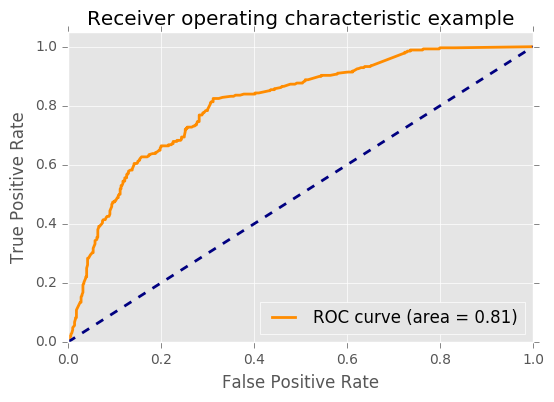

In [30]:
from sklearn.metrics import roc_curve, auc

x,y,_ = roc_curve(data[zscore][predict_class], res[-2][:,1])
area = auc(x, y)
print area

fig, ax = plt.subplots()
lw = 2
ax.plot(x, y, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % area)
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")


In [36]:
best_zscore_balanced = None
best_score = 0
grid_search = {}
sens = 0
for max_depth in range(5,16):
    for n_estimators in range(10,101,10):
        print max_depth, n_estimators
        alg = RandomForestClassifier(random_state=1, n_estimators=n_estimators ,max_depth=max_depth , min_samples_split=4, min_samples_leaf=2)
        aux = test_algorithm(alg, data[zscore], predictors, predict_class, treat_output=None, seed=1, n_folds=10, balance=True)
        
        x,y,_ = roc_curve(data[zscore][predict_class], aux[-2][:,1])
        area = auc(x, y)
        grid_search[(max_depth, n_estimators)] = [area]
        if aux[0] > best_score:
            best_score = aux[0]
            best_zscore_balanced = (max_depth, n_estimators)
            sens = sensibility(aux[-1])
    
print "best = ", best_zscore_balanced ,". Score ", best_score, ". Sensibilidade", sens

5 10
5 20
5 30
5 40
5 50
5 60
5 70
5 80
5 90
5 100
6 10
6 20
6 30
6 40
6 50
6 60
6 70
6 80
6 90
6 100
7 10
7 20
7 30
7 40
7 50
7 60
7 70
7 80
7 90
7 100
8 10
8 20
8 30
8 40
8 50
8 60
8 70
8 80
8 90
8 100
9 10
9 20
9 30
9 40
9 50
9 60
9 70
9 80
9 90
9 100
10 10
10 20
10 30
10 40
10 50
10 60
10 70
10 80
10 90
10 100
11 10
11 20
11 30
11 40
11 50
11 60
11 70
11 80
11 90
11 100
12 10
12 20
12 30
12 40
12 50
12 60
12 70
12 80
12 90
12 100
13 10
13 20
13 30
13 40
13 50
13 60
13 70
13 80
13 90
13 100
14 10
14 20
14 30
14 40
14 50
14 60
14 70
14 80
14 90
14 100
15 10
15 20
15 30
15 40
15 50
15 60
15 70
15 80
15 90
15 100
best =  (7, 90) . Score  0.770796308954 . Sensibilidade 0.772388059701


/Users/mtsodf/OneDrive/Mestrado/DataMining/macos_dataenv/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


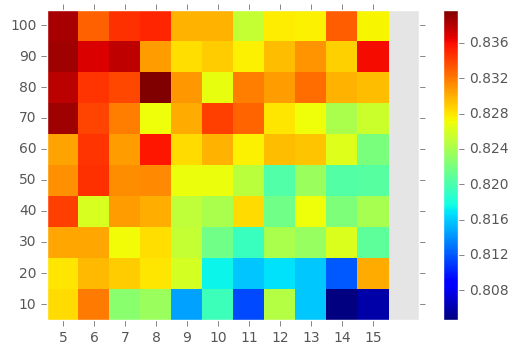

In [37]:
plot_grid_search(grid_search)

best =  (9, 90) . Score  0.77469241285 . Sensibilidade 0.761194029851


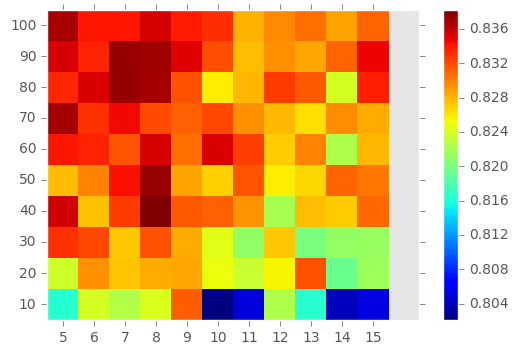

In [39]:
best_zscore_balanced = None
best_score = 0
grid_search = {}
sens = 0
for max_depth in range(5,16):
    for n_estimators in range(10,101,10):
        #print max_depth, n_estimators
        alg = RandomForestClassifier(random_state=1, n_estimators=n_estimators ,max_depth=max_depth , min_samples_split=4, min_samples_leaf=2)
        aux = test_algorithm(alg, data[zscore], predictors, predict_class, treat_output=None, seed=1, n_folds=10, balance=True)
        
        x,y,_ = roc_curve(data[zscore][predict_class], aux[-2][:,1])
        area = auc(x, y)
        grid_search[(max_depth, n_estimators)] = [area]
        if aux[0] > best_score:
            best_score = aux[0]
            best_zscore_balanced = (max_depth, n_estimators)
            sens = sensibility(aux[-1])
    
print "best = ", best_zscore_balanced ,". Score ", best_score, ". Sensibilidade", sens
plot_grid_search(grid_search)